# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [ ]:
data = pd.read_csv("store5.csv")

In [ ]:
data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


# Preprocessing Data

In [ ]:
data = data.drop(columns = ["dcoilwtico","id"])

In [ ]:
data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,5,AUTOMOTIVE,0.0,0
1,2013-01-01,5,BABY CARE,0.0,0
2,2013-01-01,5,BEAUTY,0.0,0
3,2013-01-01,5,BEVERAGES,0.0,0
4,2013-01-01,5,BOOKS,0.0,0


In [ ]:
data.describe()

,store_nbr,sales,onpromotion
count,55572.0,55572.000000,55572.000000
mean,5.0,280.580231,2.687864
std,0.0,652.588149,11.748996
min,5.0,0.000000,0.000000
25%,5.0,1.000000,0.000000
50%,5.0,19.000000,0.000000
75%,5.0,237.000000,0.000000
max,5.0,8216.620000,182.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         55572 non-null  object 
 1   store_nbr    55572 non-null  int64  
 2   family       55572 non-null  object 
 3   sales        55572 non-null  float64
 4   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [ ]:
data["date"] = pd.to_datetime(data["date"])

In [ ]:
data.set_index('date', inplace=True)

In [ ]:
weekly_sales = data['sales'].resample('W').sum()

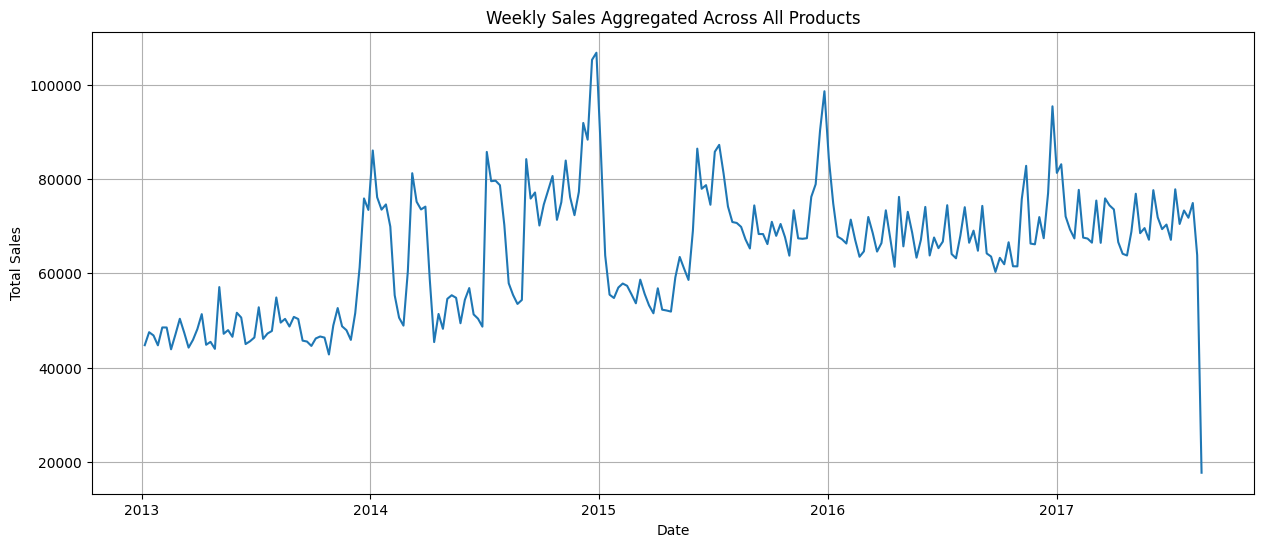

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales Aggregated Across All Products')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Train Test Split

In [ ]:
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF PACF

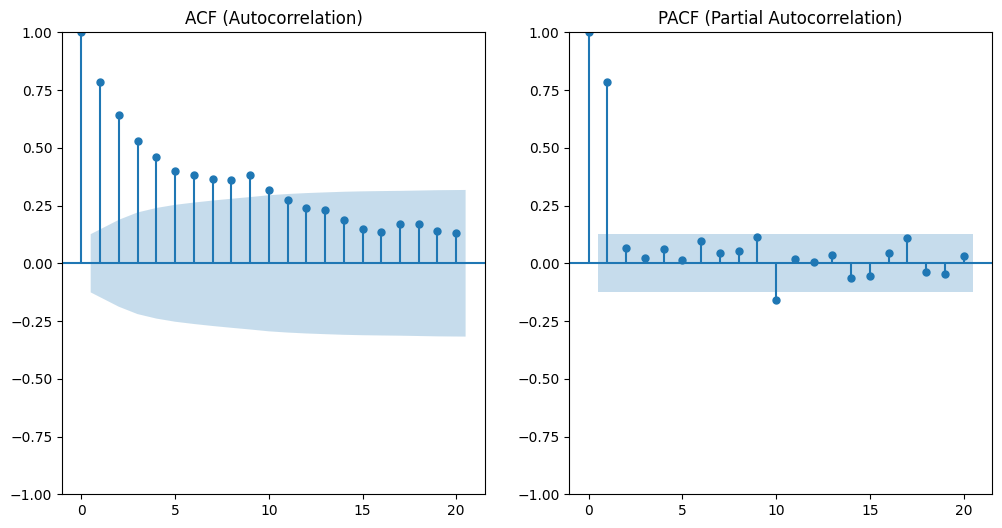

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(weekly_sales, lags=20, ax=plt.gca())
plt.title('ACF (Autocorrelation)')

plt.subplot(122)
plot_pacf(weekly_sales, lags=20, ax=plt.gca())
plt.title('PACF (Partial Autocorrelation)')

plt.show()

# Forecasting

## ARIMA

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.7 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
model=pm.auto_arima(train, m=1,seasonal=False,start_p=0,start_q=0,max_order=4,test='adf',
                   error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4824.598, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3996.642, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3998.497, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3997.563, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4659.951, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3986.106, Time=0.69 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3990.910, Time=1.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3986.546, Time=2.65 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3991.611, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3985.503, Time=6.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3986.610, T

In [ ]:
model_arima = model.fit(train)

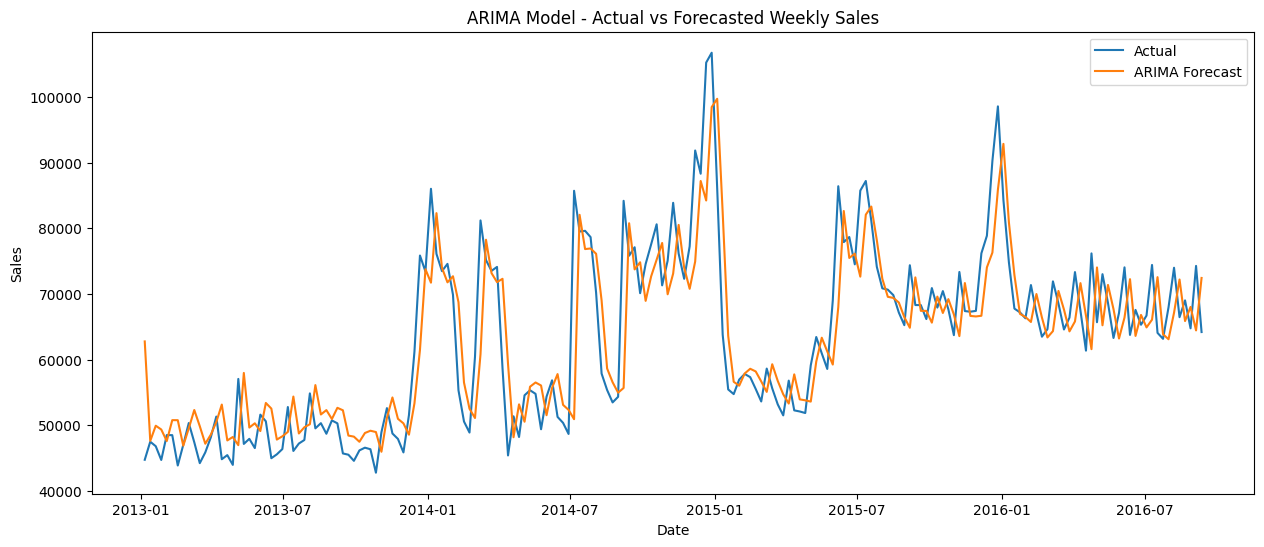

ARIMA Model Train MSE: 52005719.848
ARIMA Model Train RMSE: 7211.499
ARIMA Model Train MAE: 5199.405


In [ ]:
train_pred = model_arima.predict_in_sample(start=0, end=len(train)-1)

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(train, label='Actual')
plt.plot(train_pred, label='ARIMA Forecast')
plt.title('ARIMA Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
train_mse_arima = mean_squared_error(train, train_pred)
train_rmse_arima = mean_squared_error(train, train_pred, squared=False)
train_mae_arima = mean_absolute_error(train, train_pred)
print(f'ARIMA Model Train MSE: {train_mse_arima:.3f}')
print(f'ARIMA Model Train RMSE: {train_rmse_arima:.3f}')
print(f'ARIMA Model Train MAE: {train_mae_arima:.3f}')

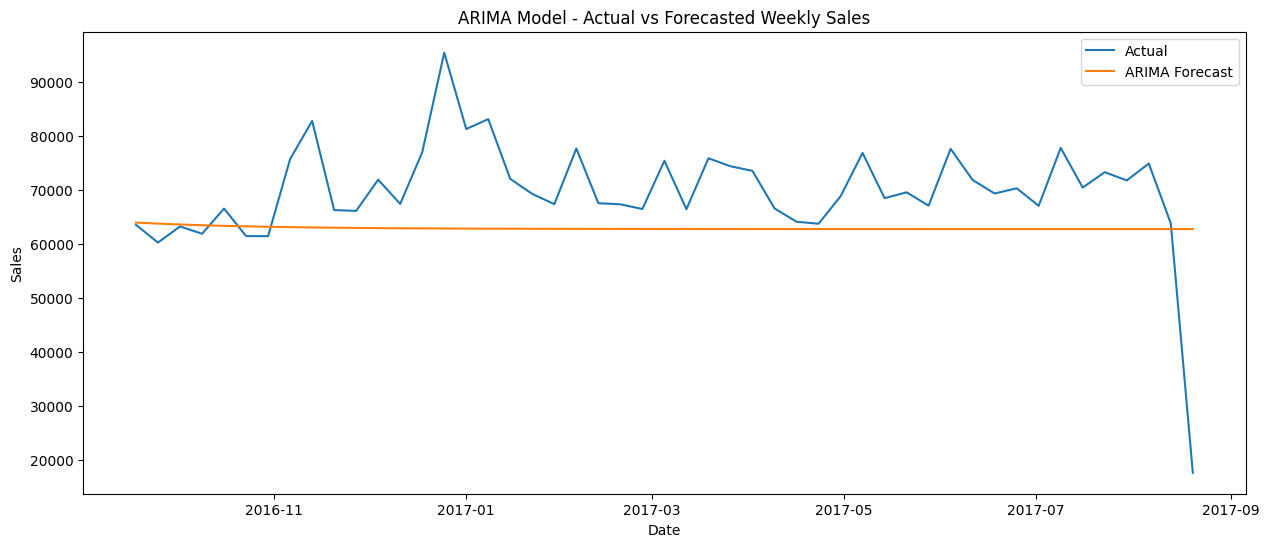

ARIMA Model Test MSE: 145860562.948
ARIMA Model Test RMSE: 12077.275
ARIMA Model Test MAE: 8890.587


In [ ]:
test_pred = model_arima.predict(n_periods=len(test))
test_pred2 = pd.Series(test_pred, index=test.index)


# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(test, label='Actual')
plt.plot(test_pred2, label='ARIMA Forecast')
plt.title('ARIMA Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
test_mse_arima = mean_squared_error(test, test_pred2)
test_rmse_arima = mean_squared_error(test, test_pred2, squared=False)
test_mae_arima = mean_absolute_error(test, test_pred2)
print(f'ARIMA Model Test MSE: {test_mse_arima:.3f}')
print(f'ARIMA Model Test RMSE: {test_rmse_arima:.3f}')
print(f'ARIMA Model Test MAE: {test_mae_arima:.3f}')

## SARIMA

In [ ]:
# Fit SARIMA model
sarima_model = pm.auto_arima(train,
                           start_p=1, start_q=1,
                           max_p=3, max_q=3,
                           m=52, # Weekly Time, seasonality annually
                           seasonal=True,
                           d=1, D=1,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=inf, Time=51.66 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2938.455, Time=0.95 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2936.098, Time=2.82 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2927.360, Time=4.24 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2939.475, Time=0.57 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=10.04 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=inf, Time=24.55 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2936.166, Time=2.69 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=inf, Time=31.09 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2925.127, Time=11.37 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=5.38 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=inf, Time=28.80 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=2934.215, Time=10.15 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=inf, Time=21.41 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=292

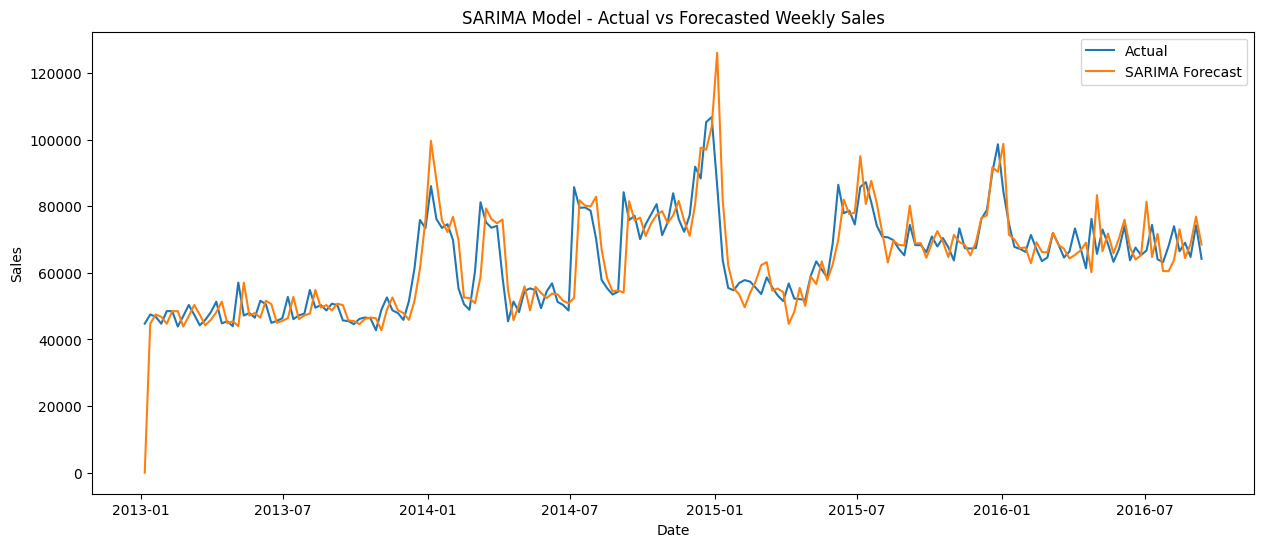

ARIMA Model Test MSE: 65862732.957
ARIMA Model Test RMSE: 8115.586
ARIMA Model Test MAE: 5151.714


In [ ]:
# Fit the model
sarima_model.fit(train)

# Forecast
forecast_sarima = sarima_model.predict_in_sample(n_periods=len(train))
forecast_sarima = pd.Series(forecast_sarima, index=train.index)

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(train, label='Actual')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('SARIMA Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
train_mse_sarima = mean_squared_error(train, forecast_sarima)
train_rmse_sarima = mean_squared_error(train, forecast_sarima, squared=False)
train_mae_sarima = mean_absolute_error(train, forecast_sarima)
print(f'ARIMA Model Test MSE: {train_mse_sarima:.3f}')
print(f'ARIMA Model Test RMSE: {train_rmse_sarima:.3f}')
print(f'ARIMA Model Test MAE: {train_mae_sarima:.3f}')

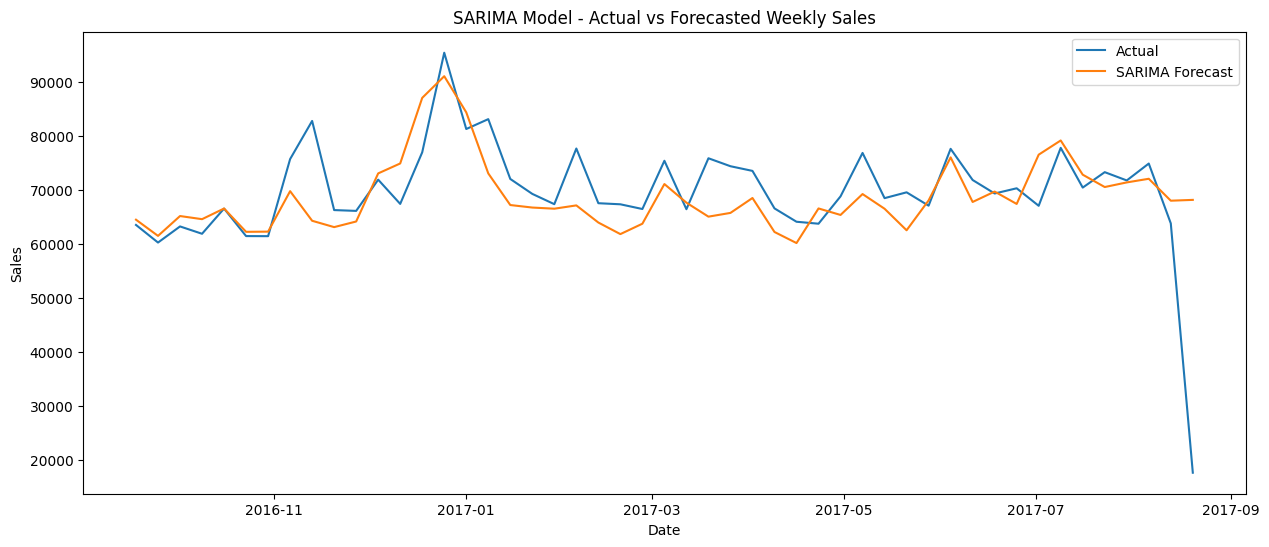

ARIMA Model Test MSE: 81442847.945
ARIMA Model Test RMSE: 9024.569
ARIMA Model Test MAE: 5090.486


In [ ]:
# Forecast
forecast_sarima = sarima_model.predict(n_periods=len(test))
forecast_sarima = pd.Series(forecast_sarima, index=test.index)

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(test, label='Actual')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('SARIMA Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
test_mse_sarima = mean_squared_error(test, forecast_sarima)
test_rmse_sarima = mean_squared_error(test, forecast_sarima, squared=False)
test_mae_sarima = mean_absolute_error(test, forecast_sarima)
print(f'ARIMA Model Test MSE: {test_mse_sarima:.3f}')
print(f'ARIMA Model Test RMSE: {test_rmse_sarima:.3f}')
print(f'ARIMA Model Test MAE: {test_mae_sarima:.3f}')

## LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(weekly_sales.values.reshape(-1, 1))

# Split the data into train and test sets
train_data_scaled = data_scaled[:train_size]
test_data_scaled = data_scaled[train_size:]

# Create a function to prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define the look_back period
look_back = 1

# Prepare the data for LSTM
X_train, Y_train = create_dataset(train_data_scaled, look_back)
X_test, Y_test = create_dataset(test_data_scaled, look_back)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [ ]:
# Evaluate the model
train_mse_lstm = mean_squared_error(Y_train[0], train_predict[:,0])
train_rmse_lstm = mean_squared_error(Y_train[0], train_predict[:,0], squared=False)
train_mae_lstm = mean_absolute_error(Y_train[0], train_predict[:,0])
print(f'LSTM Model Train MSE: {train_mse_lstm:.3f}')
print(f'LSTM Model Train RMSE: {train_rmse_lstm:.3f}')
print(f'LSTM Model Train MAE: {train_mae_lstm:.3f}')

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(Y_train[0], label='Actual')
plt.plot(train_predict[:,0], label='LSTM Forecast')
plt.title('LSTM Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_mse_lstm = mean_squared_error(Y_test[0], test_predict[:,0])
test_rmse_lstm = mean_squared_error(Y_test[0], test_predict[:,0], squared=False)
test_mae_lstm = mean_absolute_error(Y_test[0], test_predict[:,0])
print(f'LSTM Model Test MSE: {test_mse_lstm:.3f}')
print(f'LSTM Model Test RMSE: {test_rmse_lstm:.3f}')
print(f'LSTM Model Test MAE: {test_mae_lstm:.3f}')

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predict[:,0], label='LSTM Forecast')
plt.title('LSTM Model - Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Prophet

In [ ]:
!pip install prophet

from prophet import Prophet

# Prepare the data for Prophet
df_prophet = weekly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=len(test), freq='W')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()

# Plot the forecast components
fig = model.plot_components(forecast)
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = forecast['yhat'][-len(test):]
test_mse_prophet = mean_squared_error(test, y_pred)
test_rmse_prophet = mean_squared_error(test, y_pred, squared=False)
test_mae_prophet = mean_absolute_error(test, y_pred)

print(f'Prophet Model Test MSE: {test_mse_prophet:.3f}')
print(f'Prophet Model Test RMSE: {test_rmse_prophet:.3f}')
print(f'Prophet Model Test MAE: {test_mae_prophet:.3f}')


In [ ]:
# Prepare the data for Prophet
df_prophet = weekly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet[:train_size])

# Create future dataframe
future = model.make_future_dataframe(periods=len(train), freq='W')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()

# Plot the forecast components
fig = model.plot_components(forecast)
plt.show()

# Evaluate the model

y_pred = forecast['yhat'][-len(train):]
train_mse_prophet = mean_squared_error(train, y_pred)
train_rmse_prophet = mean_squared_error(train, y_pred, squared=False)
train_mae_prophet = mean_absolute_error(train, y_pred)

print(f'Prophet Model Train MSE: {train_mse_prophet:.3f}')
print(f'Prophet Model Train RMSE: {train_rmse_prophet:.3f}')
print(f'Prophet Model Train MAE: {train_mae_prophet:.3f}')


# Error Evaluation from All Method

In [ ]:
# Create a dictionary to store the results
results = {
    'Model': ['ARIMA', 'SARIMA', 'LSTM', 'Prophet'],
    'Train MSE': [train_mse_arima, train_mse_sarima, train_mse_lstm, train_mse_prophet],
    'Train RMSE': [train_rmse_arima, train_rmse_sarima, train_rmse_lstm, train_rmse_prophet],
    'Train MAE': [train_mae_arima, train_mae_sarima, train_mae_lstm, train_mae_prophet],
    'Test MSE': [test_mse_arima, test_mse_sarima, test_mse_lstm, test_mse_prophet],
    'Test RMSE': [test_rmse_arima, test_rmse_sarima, test_rmse_lstm, test_rmse_prophet],
    'Test MAE': [test_mae_arima, test_mae_sarima, test_mae_lstm, test_mae_prophet]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

results_df.set_index('Model', inplace=True)

# Apply styling to highlight the minimum value in each column
def highlight_min(data, color='blue'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # DataFrame from .apply(axis=None)
        is_min = data == data.min(axis=None)
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

# Apply the styling
results_df.style.apply(highlight_min)

In [ ]:
results_df

In [ ]:
print("Based on evaluation result LSTM showed the best performance with the lowest value of MSE, RMSE, and MAE")
print(f'LSTM Model Train MSE: {train_mse_lstm:.3f}')
print(f'LSTM Model Train RMSE: {train_rmse_lstm:.3f}')
print(f'LSTM Model Train MAE: {train_mae_lstm:.3f}')
print(f'LSTM Model Test MSE: {test_mse_lstm:.3f}')
print(f'LSTM Model Test RMSE: {test_rmse_lstm:.3f}')
print(f'LSTM Model Test MAE: {test_mae_lstm:.3f}')